(opioid)=
# Opioid
## $\frac{\partial ^2y}{\partial t^2}$

                            1. Sun
                                  \
                2. Chlorophyll -> 4. Animals -> 5. Man -> 6. Worms
                                  /
                                  3. Plants


<iframe src="../pdfs/jama_opioids.pdf" style="width: 100%; height: 600px; borders: none"></iframe>

```{figure} ../figures/blanche.png
---
width: 1
height: 1
---

_Geographic Trends in Opioid Overdoses in the US From 1999 to 2020_. The US opioid crisis has evolved over time. Ciccarone1 posited a theory of 3 overlapping waves of opioid-involved overdose deaths (OODs) based on supply (iatrogenic and new illicit sources) and demand (social, cultural, and technological). Wave 1, in approximately 2000, was prompted by doctors overprescribing opioid painkillers, which was associated with mass addiction.1 Wave 2 involved heroin; OODs from heroin escalated in 2007 and surpassed those from prescription opioids by 2015.1 Wave 3 involved illicit synthetic opioids, such as fentanyl, the use of which escalated after 2013.1 Further evidence suggests a fourth wave, complicated by the addition of stimulants and the COVID-19 pandemic.2 To inform prevention and mitigation strategies, this cross-sectional study examined trends in OOD rates in urban and rural US counties during the 4 waves.
```

- [Post et al.](../pdfs/jama_opioids.pdf)
- [Kinetics](https://www.jpsmjournal.com/article/S0885-3924(96)00300-4/pdf)
- [Controlled-release](https://pubmed.ncbi.nlm.nih.gov/8844441/)
- [Sackler](https://www.statnews.com/2019/12/03/oxycontin-history-told-through-purdue-pharma-documents/)
- [Brigham](https://www.jpsmjournal.com/article/0885-3924(95)00165-4/pdf)

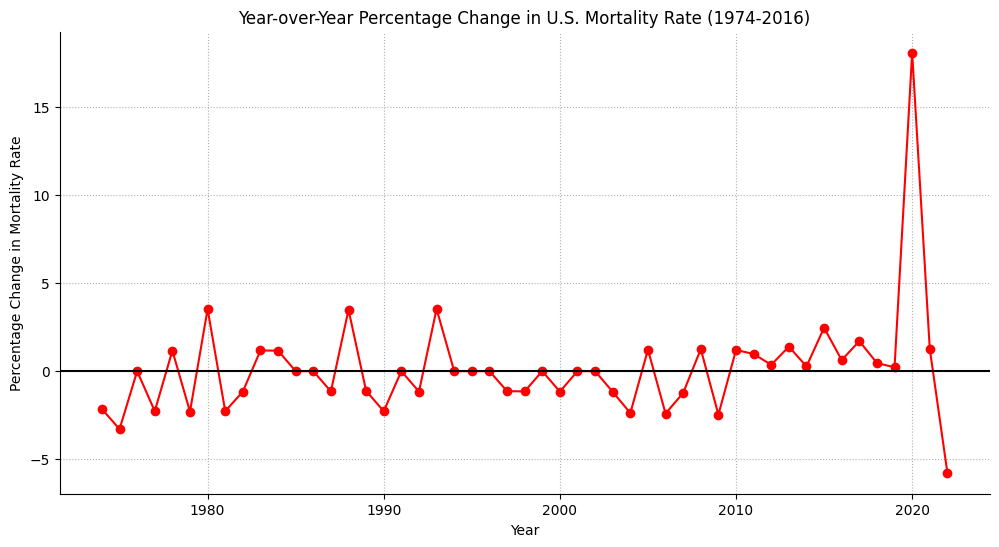

In [31]:
# Not terribly convincing

import numpy as np
import pandas as pd
import wbdata
import matplotlib.pyplot as plt
import datetime

# Define the start and end year for the data
start_year = 1973
end_year = 2023

# Fetching the crude death rate data from the World Bank
data = wbdata.get_dataframe(indicators={'SP.DYN.CDRT.IN': 'Crude Death Rate'}, 
                            country='US')

# Filter data for the specific date range and sort it
data = data[(data.index >= str(start_year)) & (data.index <= str(end_year))]
data = data.sort_index(ascending=True)

# Reset index to have years as a column
data = data.reset_index()

# Extracting the relevant columns
years = data['date'].astype(int).values
mortality_rates = data['Crude Death Rate'].values

# Calculating the year-over-year percentage change in mortality rates
yearly_change = [(mortality_rates[i] - mortality_rates[i-1]) / mortality_rates[i-1] * 100 for i in range(1, len(mortality_rates))]

# Adjusting the years for the change data
change_years = years[1:]

# Plotting the yearly change in mortality rates
plt.figure(figsize=(12, 6))
plt.plot(change_years, yearly_change, marker='o', color='red')

# Adding a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

# Setting the title and labels
plt.title("Year-over-Year Percentage Change in U.S. Mortality Rate (1974-2016)")
plt.xlabel("Year")
plt.ylabel("Percentage Change in Mortality Rate")

# Customizing the grid to be dotted
plt.grid(True, linestyle=':')

# Removing the top and right spines (rims)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


<Details>
   <Summary></Summary>

- Life
   - Eminem (1999-2003)
- Algorithm
   - Vance 
      - ii7b5: `Iraq` 2003-2007
      - V7: `Ohio State` 2007-2009
      - i: `Yale Law` 2011-2013
- Morality 
   - Hillbilly (2016)
   - Trump (2016-2020)
   - Ballot (2024)


| **Year** | **Event**                                                                                     |
|----------|-----------------------------------------------------------------------------------------------|
| **1952** | Purdue Pharma is founded by the Sackler brothers, Raymond, Mortimer, and Arthur Sackler.       |
| **1996** | Purdue introduces OxyContin, a time-released formulation of oxycodone, marketed as a safe, less addictive painkiller. |
| **2000s** | Reports begin emerging about widespread abuse of OxyContin, with the drug being linked to the growing opioid crisis. |
| **2007** | Purdue and three executives plead guilty to misleading the public about OxyContin's risk of addiction. The company pays \$634 million in fines. |
| **2010** | Purdue reformulates OxyContin to make it harder to crush and snort or inject, in an attempt to reduce abuse. |
| **2017** | Purdue ceases marketing OxyContin to doctors amidst mounting legal pressure and scrutiny over the opioid epidemic. |
| **2019** | Purdue files for bankruptcy as part of a settlement to resolve thousands of lawsuits related to its role in the opioid crisis. |
| **2020** | Purdue pleads guilty to federal criminal charges, agreeing to pay \$8.3 billion in penalties. The Sackler family agrees to pay $225 million in civil penalties. |
| **2021** | A bankruptcy judge approves a settlement plan that dissolves Purdue Pharma and channels its assets into a new public benefit company dedicated to combating the opioid crisis. |
| **2023** | Legal battles continue, particularly over the Sackler family's immunity from future opioid-related lawsuits as part of the settlement. |


</Details>

### $\mu$ Base-case
- Senses: Curated

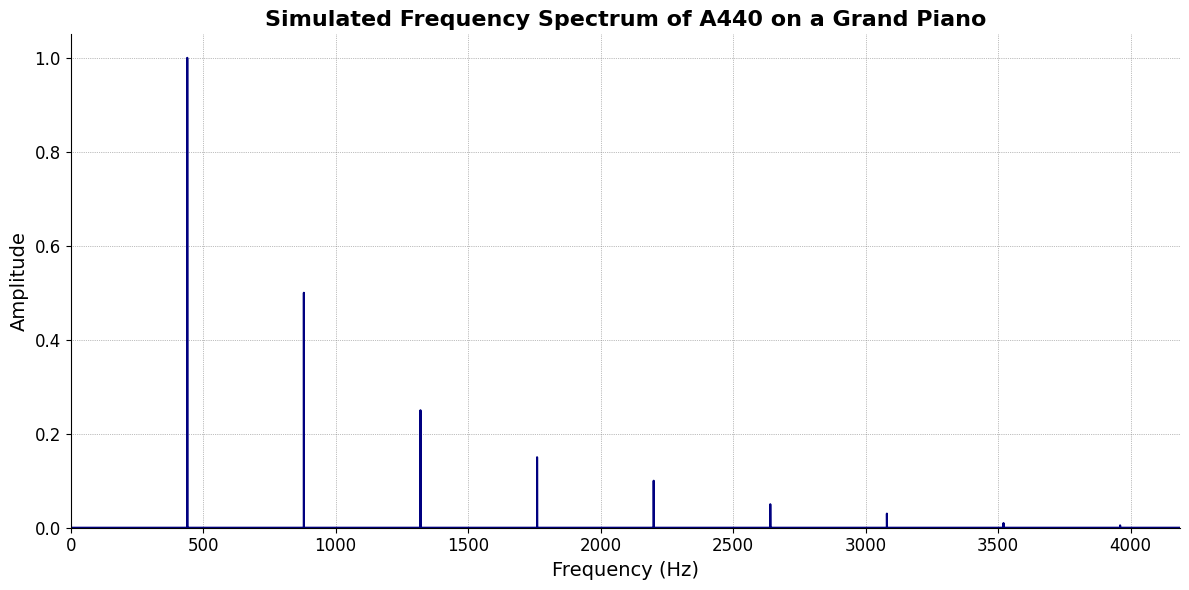

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_rate = 44100  # Hz
duration = 20.0       # seconds
A4_freq = 440.0      # Hz

# Time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Fundamental frequency (A4)
signal = np.sin(2 * np.pi * A4_freq * t)

# Adding overtones (harmonics)
harmonics = [2, 3, 4, 5, 6, 7, 8, 9]  # First few harmonics
amplitudes = [0.5, 0.25, 0.15, 0.1, 0.05, 0.03, 0.01, 0.005]  # Amplitudes for each harmonic

for i, harmonic in enumerate(harmonics):
    signal += amplitudes[i] * np.sin(2 * np.pi * A4_freq * harmonic * t)

# Perform FFT (Fast Fourier Transform)
N = len(signal)
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, 1 / sample_rate)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]), color='navy', lw=1.5)

# Aesthetics improvements
plt.title('Simulated Frequency Spectrum of A440 on a Grand Piano', fontsize=16, weight='bold')
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.xlim(0, 4186)  # Limit to the highest frequency on a piano (C8)
plt.ylim(0, None)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Light grid
plt.grid(color='grey', linestyle=':', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


- Memory: Luxury
- Emotions: Numbed

### $\sigma$ Varcov-matrix
- Evolution: Society {cite}`bourdain_obsessed_2010`

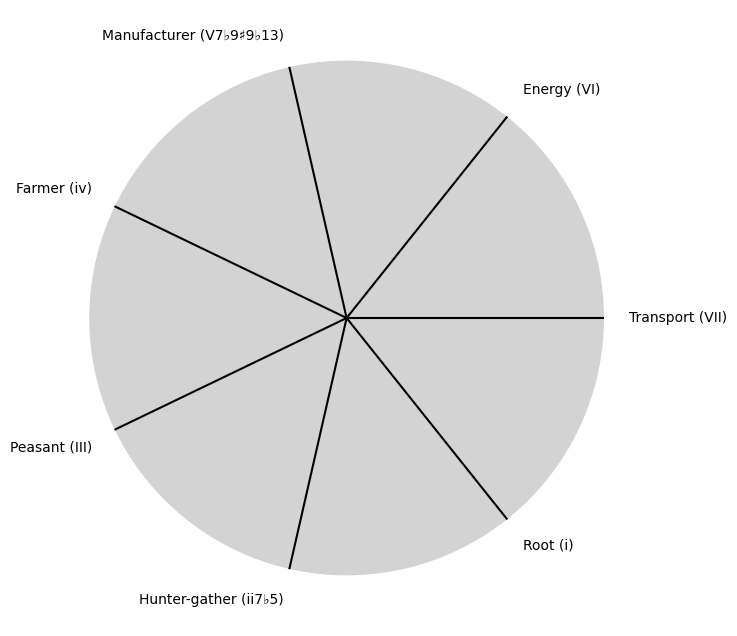

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Clock settings; f(t) random disturbances making "paradise lost"
clock_face_radius = 1.0
number_of_ticks = 7
tick_labels = [
    "Root (i)",
    "Hunter-gather (ii7♭5)", "Peasant (III)", "Farmer (iv)", "Manufacturer (V7♭9♯9♭13)",
    "Energy (VI)", "Transport (VII)"
]

# Calculate the angles for each tick (in radians)
angles = np.linspace(0, 2 * np.pi, number_of_ticks, endpoint=False)
# Inverting the order to make it counterclockwise
angles = angles[::-1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

# Draw the clock face
clock_face = plt.Circle((0, 0), clock_face_radius, color='lightgrey', fill=True)
ax.add_patch(clock_face)

# Draw the ticks and labels
for angle, label in zip(angles, tick_labels):
    x = clock_face_radius * np.cos(angle)
    y = clock_face_radius * np.sin(angle)
    
    # Draw the tick
    ax.plot([0, x], [0, y], color='black')
    
    # Positioning the labels slightly outside the clock face
    label_x = 1.1 * clock_face_radius * np.cos(angle)
    label_y = 1.1 * clock_face_radius * np.sin(angle)
    
    # Adjusting label alignment based on its position
    ha = 'center'
    va = 'center'
    if np.cos(angle) > 0:
        ha = 'left'
    elif np.cos(angle) < 0:
        ha = 'right'
    if np.sin(angle) > 0:
        va = 'bottom'
    elif np.sin(angle) < 0:
        va = 'top'
    
    ax.text(label_x, label_y, label, horizontalalignment=ha, verticalalignment=va, fontsize=10)

# Remove axes
ax.axis('off')

# Show the plot
plt.show()


### $\%$ Precision
- Needs: God-man-ai

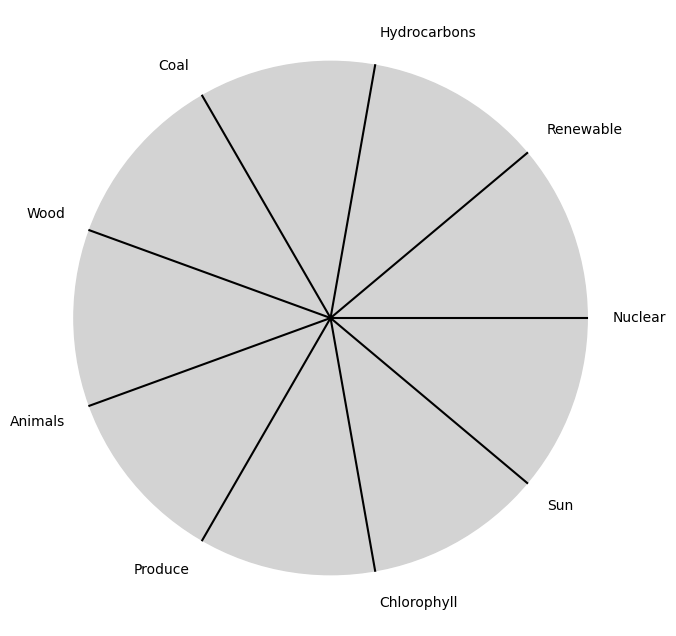

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Clock settings; f(t) random disturbances making "paradise lost"
clock_face_radius = 1.0
number_of_ticks = 9
tick_labels = [
    "Sun", "Chlorophyll", "Produce", "Animals",
    "Wood", "Coal", "Hydrocarbons", "Renewable", "Nuclear"
]

# Calculate the angles for each tick (in radians)
angles = np.linspace(0, 2 * np.pi, number_of_ticks, endpoint=False)
# Inverting the order to make it counterclockwise
angles = angles[::-1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

# Draw the clock face
clock_face = plt.Circle((0, 0), clock_face_radius, color='lightgrey', fill=True)
ax.add_patch(clock_face)

# Draw the ticks and labels
for angle, label in zip(angles, tick_labels):
    x = clock_face_radius * np.cos(angle)
    y = clock_face_radius * np.sin(angle)
    
    # Draw the tick
    ax.plot([0, x], [0, y], color='black')
    
    # Positioning the labels slightly outside the clock face
    label_x = 1.1 * clock_face_radius * np.cos(angle)
    label_y = 1.1 * clock_face_radius * np.sin(angle)
    
    # Adjusting label alignment based on its position
    ha = 'center'
    va = 'center'
    if np.cos(angle) > 0:
        ha = 'left'
    elif np.cos(angle) < 0:
        ha = 'right'
    if np.sin(angle) > 0:
        va = 'bottom'
    elif np.sin(angle) < 0:
        va = 'top'
    
    ax.text(label_x, label_y, label, horizontalalignment=ha, verticalalignment=va, fontsize=10)

# Remove axes
ax.axis('off')

# Show the plot
plt.show()


- Utility: modal-interchange-nondiminishing

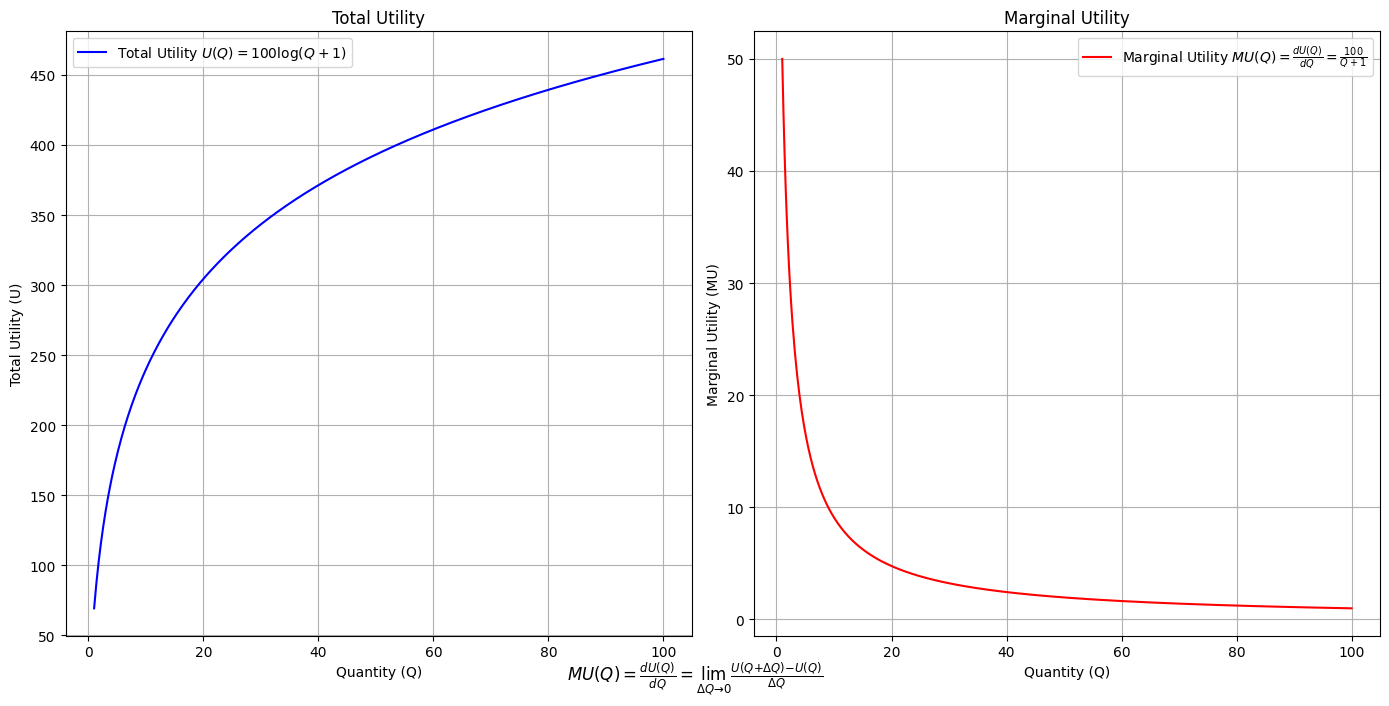

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the total utility function U(Q)
def total_utility(Q):
    return 100 * np.log(Q + 1)  # Logarithmic utility function for illustration

# Define the marginal utility function MU(Q)
def marginal_utility(Q):
    return 100 / (Q + 1)  # Derivative of the total utility function

# Generate data
Q = np.linspace(1, 100, 500)  # Quantity range from 1 to 100
U = total_utility(Q)
MU = marginal_utility(Q)

# Plotting
plt.figure(figsize=(14, 7))

# Plot Total Utility
plt.subplot(1, 2, 1)
plt.plot(Q, U, label=r'Total Utility $U(Q) = 100 \log(Q + 1)$', color='blue')
plt.title('Total Utility')
plt.xlabel('Quantity (Q)')
plt.ylabel('Total Utility (U)')
plt.legend()
plt.grid(True)

# Plot Marginal Utility
plt.subplot(1, 2, 2)
plt.plot(Q, MU, label=r'Marginal Utility $MU(Q) = \frac{dU(Q)}{dQ} = \frac{100}{Q + 1}$', color='red')
plt.title('Marginal Utility')
plt.xlabel('Quantity (Q)')
plt.ylabel('Marginal Utility (MU)')
plt.legend()
plt.grid(True)

# Adding some calculus notation and Greek symbols
plt.figtext(0.5, 0.02, r"$MU(Q) = \frac{dU(Q)}{dQ} = \lim_{\Delta Q \to 0} \frac{U(Q + \Delta Q) - U(Q)}{\Delta Q}$", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

```{figure} ../figures/blanche.png
---
width: 1px
height: 1px
---
_Essay in my $R^3 class$_. "At the end of the drama THE TRUTH — which has been overlooked, disregarded, scorned, and denied — prevails. And that is how we know the Drama is done.” Some scientists may be `sloppy` because they are — like all humans — interested in **ordering** & {ref}`curated` the world rather than in `rigorously` demonstrating a `truth`
```